In [75]:
import pandas as pd
import nltk
from nltk.classify import naivebayes

# Download the necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.classify import NaiveBayesClassifier
from nltk.classify.util import accuracy

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

from collections import Counter

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [76]:
df = pd.read_csv('CRM_2015_17_reviews.csv')

In [77]:
df

,Reviews_ID,Date,Review,Rating,Product,District_id
0,13,01/01/2015,Complicated Online Banking additional charges ...,1,Online Services,74
1,14,01/01/2015,"Frustrating lost my details, staff were so unh...",1,Online Services,22
2,15,01/01/2015,Poor Interest Rates limited services soo frust...,1,Online Services,29
3,16,01/01/2015,"Lost My Details, Staff Were So Unhelpful poor ...",1,Online Services,11
4,17,01/01/2015,To Frustrate Me error error poor interest rate...,1,Online Services,4
...,...,...,...,...,...,...
20948,20951,30/12/2017,Where I Lost My Pin secure from fraud responde...,5,Online Services,53
20949,20952,30/12/2017,Helped Me In A Case Of Fraud competitive rates...,5,Online Services,61
20950,20953,30/12/2017,Waved Fees wide range of services worried abou...,5,Online Services,77
20951,20954,30/12/2017,Responded Quick worried about fraud but waved ...,5,Online Services,11


In [78]:
#Create dataframe with just mortgage reviews
df_mortgage = df[df['Product'] == 'Mortgage']

In [79]:
#Reset the index
df_mortgage.reset_index(drop=True)

,Reviews_ID,Date,Review,Rating,Product,District_id
0,22,01/01/2015,Not Great fees unhelpful staff slow transactio...,1,Mortgage,8
1,23,01/01/2015,High Fees unhelpful staff distressed by this u...,1,Mortgage,23
2,24,01/01/2015,Terrible Manager not great my mum long wait ti...,1,Mortgage,39
3,25,01/01/2015,Rising bad financial advice rude customer serv...,1,Mortgage,39
4,41,02/01/2015,Terrible Manager i hope youre proud of yoursel...,1,Mortgage,12
...,...,...,...,...,...,...
1828,20918,29/12/2017,Worried But Got Really Helpful Advise On Remor...,5,Mortgage,67
1829,20919,29/12/2017,Friendly Staff waved fees excellent financial ...,5,Mortgage,29
1830,20920,29/12/2017,Helpful Customer Service remortgaged very good...,5,Mortgage,36
1831,20921,29/12/2017,"Froze The Interest Rate reliable, excellent fi...",5,Mortgage,39


In [80]:
# create two dataframe one for negative reviews one for positive reviews 
df_mortgage1 = df_mortgage[df_mortgage['Rating']==1].copy()
df_mortgage5 = df_mortgage[df_mortgage['Rating']==5].copy()

In [81]:
df_mortgage5v3 = df_mortgage[df_mortgage['Rating']==5].copy()

In [82]:
df_mortgage1

,Reviews_ID,Date,Review,Rating,Product,District_id
9,22,01/01/2015,Not Great fees unhelpful staff slow transactio...,1,Mortgage,8
10,23,01/01/2015,High Fees unhelpful staff distressed by this u...,1,Mortgage,23
11,24,01/01/2015,Terrible Manager not great my mum long wait ti...,1,Mortgage,39
12,25,01/01/2015,Rising bad financial advice rude customer serv...,1,Mortgage,39
22,41,02/01/2015,Terrible Manager i hope youre proud of yoursel...,1,Mortgage,12
...,...,...,...,...,...,...
8087,20868,25/02/2016,What Happened terrible manager not great.,1,Mortgage,9
8100,20902,25/02/2016,I Hope Youre Proud Of Yourselves!! rising slow...,1,Mortgage,62
8105,20922,26/02/2016,My Mum rising rude customer service fees.,1,Mortgage,71
8106,20923,26/02/2016,Unhelpful Staff terrible manager poor interest...,1,Mortgage,5


In [83]:
#Create a function to remove stop_Words and lemmatize the data and change everything to lower case
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def remove_stopwords_and_lemmatize(Review):
    # Tokenize the reviews
    tokens = word_tokenize(Review)
    # Remove stop words and lemmatize the tokens
    filtered_tokens = [lemmatizer.lemmatize(word.lower()) for word in tokens if word.lower() not in stop_words and word.isalpha()]
    # Reconstruct the text without stop words
    filtered_review = ' '.join(filtered_tokens)
    return filtered_review    

In [84]:
# run the function to remove stopwords and lemmatize on the two mortgage dataframe df_mortgage1 & df_mortgage5
df_mortgage1['Review'] = df_mortgage1['Review'].apply(remove_stopwords_and_lemmatize)
df_mortgage5['Review'] = df_mortgage5['Review'].apply(remove_stopwords_and_lemmatize)

In [85]:
#Tokenise each word on two mortgage dataframe df_mortgage1 & df_mortgage5 so i can check common words
df_mortgage1['Tokens'] = df_mortgage1['Review'].apply(word_tokenize)
df_mortgage5['Tokens'] = df_mortgage5['Review'].apply(word_tokenize)

In [86]:
#View stop word,lemmatize tokenise dataframe
df_mortgage1

,Reviews_ID,Date,Review,Rating,Product,District_id,Tokens
9,22,01/01/2015,great fee unhelpful staff slow transaction mum,1,Mortgage,8,"[great, fee, unhelpful, staff, slow, transacti..."
10,23,01/01/2015,high fee unhelpful staff distressed unhelpful ...,1,Mortgage,23,"[high, fee, unhelpful, staff, distressed, unhe..."
11,24,01/01/2015,terrible manager great mum long wait time bad ...,1,Mortgage,39,"[terrible, manager, great, mum, long, wait, ti..."
12,25,01/01/2015,rising bad financial advice rude customer serv...,1,Mortgage,39,"[rising, bad, financial, advice, rude, custome..."
22,41,02/01/2015,terrible manager hope youre proud limited serv...,1,Mortgage,12,"[terrible, manager, hope, youre, proud, limite..."
...,...,...,...,...,...,...,...
8087,20868,25/02/2016,happened terrible manager great,1,Mortgage,9,"[happened, terrible, manager, great]"
8100,20902,25/02/2016,hope youre proud rising slow transaction hope ...,1,Mortgage,62,"[hope, youre, proud, rising, slow, transaction..."
8105,20922,26/02/2016,mum rising rude customer service fee,1,Mortgage,71,"[mum, rising, rude, customer, service, fee]"
8106,20923,26/02/2016,unhelpful staff terrible manager poor interest...,1,Mortgage,5,"[unhelpful, staff, terrible, manager, poor, in..."


In [87]:
#View stop word,lemmatize tokenise dataframe
df_mortgage5

,Reviews_ID,Date,Review,Rating,Product,District_id,Tokens
8120,1,26/02/2016,reliable bad fast transaction wide range servi...,5,Mortgage,6,"[reliable, bad, fast, transaction, wide, range..."
8154,67,28/02/2016,remortgaged easy online banking friendly staff...,5,Mortgage,36,"[remortgaged, easy, online, banking, friendly,..."
8165,91,29/02/2016,bad friendly staff competitive rate thank fast...,5,Mortgage,14,"[bad, friendly, staff, competitive, rate, than..."
8166,92,29/02/2016,reliable wide range service stressed first tho...,5,Mortgage,6,"[reliable, wide, range, service, stressed, fir..."
8194,137,01/03/2016,remortgaged good easy online banking easy onli...,5,Mortgage,16,"[remortgaged, good, easy, online, banking, eas..."
...,...,...,...,...,...,...,...
20924,20918,29/12/2017,worried got really helpful advise remorgaging ...,5,Mortgage,67,"[worried, got, really, helpful, advise, remorg..."
20925,20919,29/12/2017,friendly staff waved fee excellent financial a...,5,Mortgage,29,"[friendly, staff, waved, fee, excellent, finan..."
20926,20920,29/12/2017,helpful customer service remortgaged good froz...,5,Mortgage,36,"[helpful, customer, service, remortgaged, good..."
20927,20921,29/12/2017,froze interest rate reliable excellent financi...,5,Mortgage,39,"[froze, interest, rate, reliable, excellent, f..."


In [88]:
# Count of all the words in df_mortgage1
all_wordsmortgage1 = [word for tokens in df_mortgage1['Tokens'] for word in tokens]
word_freqmortgage1 = Counter(all_wordsmortgage1)

# Get the most common words
most_common_words1final = word_freqmortgage1.most_common()

# Print the most common words
for word, freq in most_common_words1final[:]:
    print(f"{word}: {freq}")

fee: 641
service: 616
slow: 341
transaction: 341
mum: 327
limited: 323
additional: 323
charge: 323
terrible: 322
manager: 322
high: 321
poor: 318
interest: 318
rate: 318
rising: 317
insecure: 316
long: 308
wait: 308
time: 308
hope: 306
youre: 306
proud: 306
unhelpful: 305
staff: 305
bad: 303
financial: 303
advice: 303
happened: 302
great: 297
distressed: 296
rude: 293
customer: 293


In [89]:
# Count of all the words in df_mortgage5
all_wordsmortgage5 = [word for tokens in df_mortgage5['Tokens'] for word in tokens]
word_freqmortgage5 = Counter(all_wordsmortgage5)

# Get the most common words
most_common_words5final = word_freqmortgage5.most_common()

# Print the most common words
for word, freq in most_common_words5final[:]:
    print(f"{word}: {freq}")

service: 544
rate: 530
helpful: 527
fast: 302
transaction: 302
wide: 280
range: 280
bad: 275
thank: 275
waved: 275
fee: 275
good: 272
froze: 268
interest: 268
customer: 264
ease: 264
worried: 263
got: 263
really: 263
advise: 263
remorgaging: 263
stressed: 262
first: 262
tho: 262
competitive: 262
reliable: 260
friendly: 251
staff: 251
easy: 241
online: 241
banking: 241
excellent: 240
financial: 240
advice: 240
remortgaged: 235


In [90]:
# Define the common words to investigate
words_of_interest = ['service', 'rate']

# Initialize counters
counters = {word: {'positive': 0, 'negative': 0} for word in words_of_interest}

# Function to count occurrences of words in a list of tokens
def count_occurrences(tokens_list, word):
    return sum(tokens.count(word) for tokens in tokens_list)

for word in words_of_interest:
    counters[word]['negative'] = count_occurrences(df_mortgage1['Tokens'], word)
    counters[word]['positive'] = count_occurrences(df_mortgage5['Tokens'], word)

# Calculate ratios of positive to negative mentions
ratios = {word: (count['positive'] / max(count['negative'], 1)) for word, count in counters.items()}

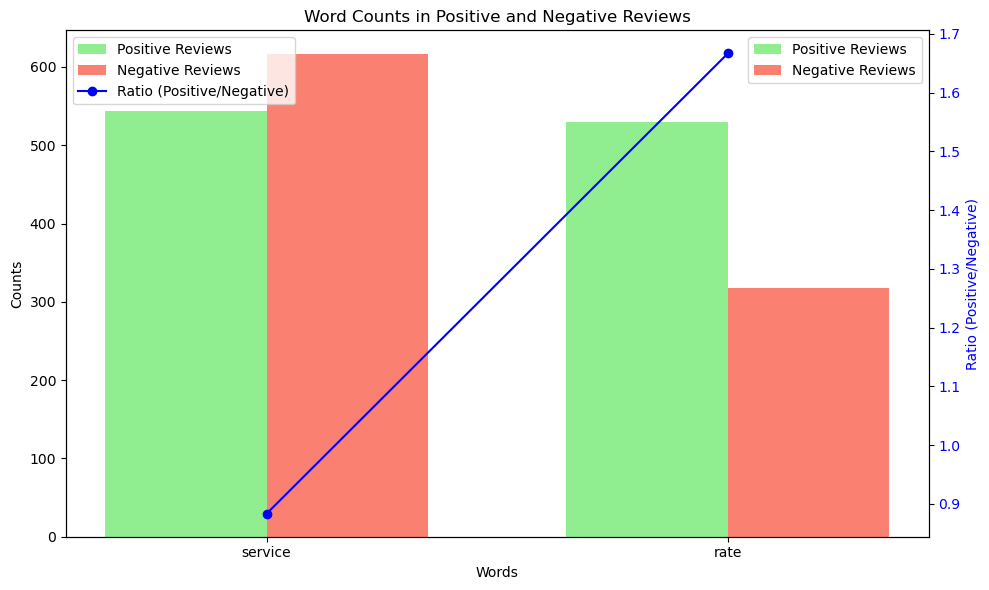

In [91]:
import matplotlib.pyplot as plt
import numpy as np

# Words of interest
words = list(counters.keys())

# Counts for positive and negative mentions
positive_counts = [counters[word]['positive'] for word in words]
negative_counts = [counters[word]['negative'] for word in words]

# Ratios
ratios_list = [ratios[word] for word in words]

# Setting up the figure and axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for counts
indices = np.arange(len(words))  # the x locations for the groups
width = 0.35  # the width of the bars

bar1 = ax1.bar(indices - width/2, positive_counts, width, label='Positive Reviews', color='lightgreen')
bar2 = ax1.bar(indices + width/2, negative_counts, width, label='Negative Reviews', color='salmon')

ax1.set_xlabel('Words')
ax1.set_ylabel('Counts')
ax1.set_title('Word Counts in Positive and Negative Reviews')
ax1.set_xticks(indices)
ax1.set_xticklabels(words)
ax1.legend()

# Instantiate a second y-axis to plot ratio
ax2 = ax1.twinx()
ax2.set_ylabel('Ratio (Positive/Negative)', color='blue')
line = ax2.plot(indices, ratios_list, label='Ratio (Positive/Negative)', color='blue', marker='o')
ax2.tick_params(axis='y', labelcolor='blue')

# Adding a legend for the ratio line
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

fig.tight_layout()
plt.show()

In [92]:
import re

def extract_surround_words(text, keyword, n):
    '''
    Extract words around a specified keyword in a given text.
    
    Parameters:
    - text (str): The input text.
    - keyword (str): The search keyword.
    - n (int): Number of words to extract around the keyword.
    
    Returns:
    - A list of tuples, each containing the words before and after the keyword.
    '''
    # Making both text and keyword lowercase for case-insensitive search
    text_lower = text.lower()
    keyword_lower = keyword.lower()
    
    # Adjusting the regex to include apostrophes and hyphens in words
    words = re.findall(r"[\w'-]+", text_lower)
    
    results = []
    for index, word in enumerate(words):
        if word == keyword_lower:
            left_side_words = words[max(index-n, 0) : index]
            right_side_words = words[index+1 : index + n + 1]
            results.append((left_side_words, right_side_words))
    return results

In [93]:
df_mortgage1['context_around_service'] = df_mortgage1['Review'].apply(lambda text: extract_surround_words(text, 'service', 3))

In [94]:
df_mortgage1['context_around_service']

9                                                      []
10                                                     []
11                                                     []
12      [([advice, rude, customer], [unhelpful, staff,...
22      [([youre, proud, limited], [distressed, poor, ...
                              ...                        
8087                                                   []
8100                                                   []
8105                  [([rising, rude, customer], [fee])]
8106                                                   []
8113        [([rude, customer], [mum, unhelpful, staff])]
Name: context_around_service, Length: 1027, dtype: object

In [95]:
df_mortgage1.to_csv('rating13words.csv')

In [96]:
#For rating 1 it seems that the general consenus is that they had rude customer service with rude and customer showing everytime the word service is mentioned, Staff were unhelpful, with rating 5 helpful customer comes up everytime that service has beeen mentioned
# For Rating 1 the consenus is that the interest rates are poor for rating 5 the interest rates are classes as competitive with that showing up every time the word rates is mentioned

In [97]:
df_mortgage5['context_around_service'] = df_mortgage5['Review'].apply(lambda text: extract_surround_words(text, 'service', 3))

In [98]:
df_mortgage5.to_csv('rating5service.csv')

In [99]:
df_mortgage1['context_around_service'] = df_mortgage1['Review'].apply(lambda text: extract_surround_words(text, 'rates', 3))
df_mortgage5['context_around_service'] = df_mortgage5['Review'].apply(lambda text: extract_surround_words(text, 'rates', 3))

In [100]:
df_mortgage1.to_csv('rating1rate.csv')
df_mortgage5.to_csv('rating5rate.csv')

In [101]:
df_mortgage.groupby(['Rating', 'District_id'])

In [102]:
df_mortgage.to_csv('df_mortgage.csv')

In [103]:
def calculate_ratio(group):
    positive_ratings = group[group['Rating'] == 5].count()
    negative_ratings = group[group['Rating'] == 1].count()
    # To avoid division by zero, add a small number to the denominator
    ratio = positive_ratings / (negative_ratings)
    return ratio

In [104]:
calculate_ratio_series = df_mortgage.groupby('District_id').apply(calculate_ratio)['Rating']

In [105]:
rating_Countstest1 = df_mortgage.groupby('District_id')['Rating'].value_counts().unstack(fill_value=0)

In [106]:
#View Dataframe info
rating_Countstest1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 76 entries, 1 to 76
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   1       76 non-null     int64
 1   5       76 non-null     int64
dtypes: int64(2)
memory usage: 1.8 KB


In [107]:
#Preview Dataframe
rating_Countstest1

Rating,1,5
District_id,,
1,2,1
2,6,5
3,9,84
4,4,4
5,9,4
...,...,...
72,9,2
73,4,3
74,7,4


In [108]:
#Reset the index
rating_Countstest1.reset_index()

Rating,District_id,1,5
0,1,2,1
1,2,6,5
2,3,9,84
3,4,4,4
4,5,9,4
...,...,...,...
71,72,9,2
72,73,4,3
73,74,7,4
74,75,2,2


In [109]:
#Check index reset correctly 
rating_Countstest1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 76 entries, 1 to 76
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   1       76 non-null     int64
 1   5       76 non-null     int64
dtypes: int64(2)
memory usage: 1.8 KB


In [110]:
#Rename columns
rating_Countstest1.rename(columns={1: 'Rating 1', 5: 'Rating 5'}, inplace=True)

In [111]:
rating_Countstest1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 76 entries, 1 to 76
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Rating 1  76 non-null     int64
 1   Rating 5  76 non-null     int64
dtypes: int64(2)
memory usage: 1.8 KB


In [112]:
#check renamed columns completed correctly 
rating_Countstest1

Rating,Rating 1,Rating 5
District_id,,
1,2,1
2,6,5
3,9,84
4,4,4
5,9,4
...,...,...
72,9,2
73,4,3
74,7,4


In [113]:
#Recalculate proportion as incorrectly shown above
rating_Countstest1['Proportion'] = rating_Countstest1['Rating 5'] / rating_Countstest1['Rating 1']

In [114]:
#Preview Dataframe
rating_Countstest1

Rating,Rating 1,Rating 5,Proportion
District_id,,,
1,2,1,0.500000
2,6,5,0.833333
3,9,84,9.333333
4,4,4,1.000000
5,9,4,0.444444
...,...,...,...
72,9,2,0.222222
73,4,3,0.750000
74,7,4,0.571429


In [115]:
# Check top 60 proportions
rating_Countstest1.head(60)

Rating,Rating 1,Rating 5,Proportion
District_id,,,
1,2,1,0.500000
2,6,5,0.833333
3,9,84,9.333333
4,4,4,1.000000
5,9,4,0.444444
6,5,73,14.600000
7,4,5,1.250000
8,102,4,0.039216
9,74,6,0.081081


In [116]:
Ratings_sortedtop = rating_Countstest1.sort_values(by='Proportion', ascending=False)

In [117]:
Ratings_sortedtop

Rating,Rating 1,Rating 5,Proportion
District_id,,,
50,0,3,inf
40,0,4,inf
36,3,85,28.333333
16,4,95,23.750000
76,5,98,19.600000
...,...,...,...
66,79,3,0.037975
11,84,2,0.023810
39,90,2,0.022222


In [118]:
Ratings_sortedbot = rating_Countstest1.sort_values(by='Proportion', ascending=True)

In [119]:
Ratings_sortedbot

Rating,Rating 1,Rating 5,Proportion
District_id,,,
69,6,0,0.000000
55,100,2,0.020000
39,90,2,0.022222
11,84,2,0.023810
66,79,3,0.037975
...,...,...,...
76,5,98,19.600000
16,4,95,23.750000
36,3,85,28.333333


## Model Building

In [120]:
df_mortgage1

,Reviews_ID,Date,Review,Rating,Product,District_id,Tokens,context_around_service
9,22,01/01/2015,great fee unhelpful staff slow transaction mum,1,Mortgage,8,"[great, fee, unhelpful, staff, slow, transacti...",[]
10,23,01/01/2015,high fee unhelpful staff distressed unhelpful ...,1,Mortgage,23,"[high, fee, unhelpful, staff, distressed, unhe...",[]
11,24,01/01/2015,terrible manager great mum long wait time bad ...,1,Mortgage,39,"[terrible, manager, great, mum, long, wait, ti...",[]
12,25,01/01/2015,rising bad financial advice rude customer serv...,1,Mortgage,39,"[rising, bad, financial, advice, rude, custome...",[]
22,41,02/01/2015,terrible manager hope youre proud limited serv...,1,Mortgage,12,"[terrible, manager, hope, youre, proud, limite...",[]
...,...,...,...,...,...,...,...,...
8087,20868,25/02/2016,happened terrible manager great,1,Mortgage,9,"[happened, terrible, manager, great]",[]
8100,20902,25/02/2016,hope youre proud rising slow transaction hope ...,1,Mortgage,62,"[hope, youre, proud, rising, slow, transaction...",[]
8105,20922,26/02/2016,mum rising rude customer service fee,1,Mortgage,71,"[mum, rising, rude, customer, service, fee]",[]
8106,20923,26/02/2016,unhelpful staff terrible manager poor interest...,1,Mortgage,5,"[unhelpful, staff, terrible, manager, poor, in...",[]


In [121]:
df_mortgage5

,Reviews_ID,Date,Review,Rating,Product,District_id,Tokens,context_around_service
8120,1,26/02/2016,reliable bad fast transaction wide range servi...,5,Mortgage,6,"[reliable, bad, fast, transaction, wide, range...",[]
8154,67,28/02/2016,remortgaged easy online banking friendly staff...,5,Mortgage,36,"[remortgaged, easy, online, banking, friendly,...",[]
8165,91,29/02/2016,bad friendly staff competitive rate thank fast...,5,Mortgage,14,"[bad, friendly, staff, competitive, rate, than...",[]
8166,92,29/02/2016,reliable wide range service stressed first tho...,5,Mortgage,6,"[reliable, wide, range, service, stressed, fir...",[]
8194,137,01/03/2016,remortgaged good easy online banking easy onli...,5,Mortgage,16,"[remortgaged, good, easy, online, banking, eas...",[]
...,...,...,...,...,...,...,...,...
20924,20918,29/12/2017,worried got really helpful advise remorgaging ...,5,Mortgage,67,"[worried, got, really, helpful, advise, remorg...",[]
20925,20919,29/12/2017,friendly staff waved fee excellent financial a...,5,Mortgage,29,"[friendly, staff, waved, fee, excellent, finan...",[]
20926,20920,29/12/2017,helpful customer service remortgaged good froz...,5,Mortgage,36,"[helpful, customer, service, remortgaged, good...",[]
20927,20921,29/12/2017,froze interest rate reliable excellent financi...,5,Mortgage,39,"[froze, interest, rate, reliable, excellent, f...",[]


In [122]:
#Standardise the data so there are the same sized samples of 1 and 5 rated reviews

#Sample appropriate sizes from 1's and 5's 

df_mortgage1_sample = df_mortgage1.sample(n=800, random_state=42)
df_mortgage5_sample = df_mortgage5.sample(n=800, random_state=42)
print('number of 1-star reviews {}'.format(len(df_mortgage1_sample)))
print('number of 5-star reviews {}'.format(len(df_mortgage5_sample)))

number of 1-star reviews 800
number of 5-star reviews 800


In [123]:
#concat the equally sized samples, filter to two columns, reset index
df_mortgagemodel = pd.concat([df_mortgage1_sample, df_mortgage5_sample])
df_mortgagemodel = df_mortgagemodel[['Review', 'Rating']]
df_mortgagemodel = df_mortgagemodel.reset_index(drop=True)
df_mortgagemodel

,Review,Rating
0,insecure additional charge limited service hop...,1
1,happened happened fee rude customer service,1
2,poor interest rate rude customer service addit...,1
3,happened happened rude customer service bad fi...,1
4,high fee happened hope youre proud rude custom...,1
...,...,...
1595,worried got really helpful advise remorgaging ...,5
1596,wide range service reliable fast transaction,5
1597,worried got really helpful advise remorgaging ...,5
1598,waved fee froze interest rate stressed first t...,5


In [124]:
# Now when you run the function to remove stopwords and lemmatize, it should not give you the warning
df_mortgagemodel['Review'] = df_mortgagemodel['Review'].apply(remove_stopwords_and_lemmatize)
#tokenise each
df_mortgagemodel['Tokens'] = df_mortgagemodel['Review'].apply(word_tokenize)

In [125]:
df_mortgagemodel['Rating'].value_counts()

Rating
1    800
5    800
Name: count, dtype: int64

In [126]:
df_mortgagemodel.Tokens[800]

['competitive',
 'rate',
 'wide',
 'range',
 'service',
 'easy',
 'online',
 'banking',
 'fast',
 'transaction',
 'worried',
 'got',
 'really',
 'helpful',
 'advise',
 'remorgaging',
 'bad']

In [127]:
import pandas as pd
from nltk import NaiveBayesClassifier
from nltk.classify.util import accuracy
from sklearn.model_selection import train_test_split


# Prepare the data
def document_features(token_list):
    return {token: True for token in token_list}

data = [(document_features(tokens), str(score)) for tokens, score in zip(df_mortgagemodel['Tokens'], df_mortgagemodel['Rating'])]


In [128]:
# Split the data
train_data, test_data = train_test_split(data, test_size=0.30, random_state=42)

# Train the classifier
clf = NaiveBayesClassifier.train(train_data)

In [129]:
from sklearn.metrics import confusion_matrix

test_actual = [label for _, label in test_data]
test_pred = [clf.classify(features) for features, _ in test_data]

# Generate the confusion matrix using sklearn
cm = confusion_matrix(test_actual, test_pred)


# You might need to explicitly define your labels
labels = sorted(set(test_actual))  # Sort labels if necessary

cm_df = pd.DataFrame(cm, index=labels, columns=labels)

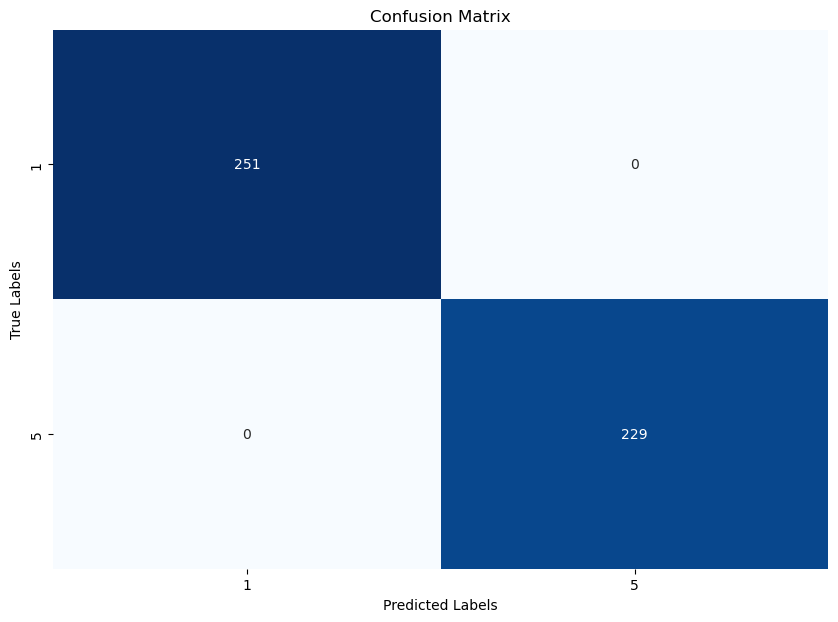

In [130]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [131]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

accuracy = accuracy_score(test_actual, test_pred)
print(f"Accuracy: {accuracy:.2f}")



report = classification_report(test_actual, test_pred)
print(report)

Accuracy: 1.00
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       251
           5       1.00      1.00      1.00       229

    accuracy                           1.00       480
   macro avg       1.00      1.00      1.00       480
weighted avg       1.00      1.00      1.00       480



In [132]:
# Show the most informative features
informative_features =clf.show_most_informative_features(100)

Most Informative Features
                    rate = True                5 : 1      =      2.0 : 1.0
                 helpful = None                1 : 5      =      1.9 : 1.0
                     fee = True                1 : 5      =      1.6 : 1.0
                    rate = None                1 : 5      =      1.5 : 1.0
                   thank = None                1 : 5      =      1.5 : 1.0
                    fast = None                1 : 5      =      1.5 : 1.0
                   range = None                1 : 5      =      1.5 : 1.0
                    wide = None                1 : 5      =      1.5 : 1.0
             competitive = None                1 : 5      =      1.4 : 1.0
                    ease = None                1 : 5      =      1.4 : 1.0
                    good = None                1 : 5      =      1.4 : 1.0
                    slow = None                5 : 1      =      1.4 : 1.0
                   first = None                1 : 5      =      1.4 : 1.0

In [133]:
from nltk.tokenize import word_tokenize

def simple_preprocess_and_features(text):
    # Tokenize the text
    tokens = word_tokenize(text.lower())  # Lowercasing and tokenizing
    # Convert tokens to a feature dictionary
    features = {word: True for word in tokens}
    return features


In [134]:
# Positive Review
new_text = "mortgage appointment was great, I was able to borrow what I needed to buy my first house so happy"

# Preprocess the text and extract features
features = simple_preprocess_and_features(new_text)

# Use the classifier to predict
predicted_label = clf.classify(features)
print(f"Predicted label: {predicted_label}")

# Get the probability distribution
prob_dist = clf.prob_classify(features)
print(f"Probabilities:")
for label in clf.labels():
    print(f"{label}: {prob_dist.prob(label):.4f}")



Predicted label: 5
Probabilities:
5: 0.5168
1: 0.4832


In [135]:
# Negative review
new_text = "so long winded wouldn't recommend"

# Preprocess the text and extract features
features = simple_preprocess_and_features(new_text)

# Use the classifier to predict
predicted_label = clf.classify(features)
print(f"Predicted label: {predicted_label}")

# Get the probability distribution
prob_dist = clf.prob_classify(features)
print(f"Probabilities:")
for label in clf.labels():
    print(f"{label}: {prob_dist.prob(label):.4f}")


Predicted label: 1
Probabilities:
5: 0.0031
1: 0.9969


In [136]:
# Neutral - negative
new_text = "mortgage appointment was okay nothing special"

# Preprocess the text and extract features
features = simple_preprocess_and_features(new_text)

# Use the classifier to predict
predicted_label = clf.classify(features)
print(f"Predicted label: {predicted_label}")

# Get the probability distribution
prob_dist = clf.prob_classify(features)
print(f"Probabilities:")
for label in clf.labels():
    print(f"{label}: {prob_dist.prob(label):.4f}")


Predicted label: 5
Probabilities:
5: 0.5098
1: 0.4902
